### Exploring DBSCAN so that it helps us find the optimum number of clusters
It's also a good way of detecting outliers

In [15]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [16]:
# get location from clean pickel file
cln_pkl_loc = Path('/work/cleanweathersmall.pkl')
# load it onto df
df = pd.read_pickle(cln_pkl_loc)
# quick look at the df
df.sample(3)

,station,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
1843783,KDTL0,2022-04-10 13:00:00,3.0,-1.0,75.0,0.5,0.0,0.0,1005.0
1514105,KBKX0,2022-05-23 23:00:00,17.2,5.2,45.0,0.0,250.0,22.3,1023.2
1616700,KCBF0,2022-06-27 18:00:00,26.0,-0.2,18.0,0.0,0.0,0.0,1026.0
1568011,KBWP0,2022-01-05 01:00:00,-13.0,-14.0,92.0,0.1,320.0,42.5,1006.0
994249,8ZB0I,2022-01-28 20:00:00,-14.7,-20.4,62.0,0.0,291.0,0.0,1027.4
443182,71750,2022-01-04 11:00:00,-18.2,-20.5,82.0,0.0,40.0,11.0,1021.7
2004929,KFET0,2022-07-08 23:00:00,28.4,21.9,68.0,0.0,360.0,14.8,1019.0


In [17]:
# our timeframe; shape of df
df.time.min(), df.time.max(), df.shape

(Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-09-22 23:00:00'),
 (3765246, 9))

In [18]:
# convert time from Timestamp type to int type (int value will be in Unix Epoch time)
df.time = df.time.astype(int)/10**9
# replace infinity values witn Nan; if any
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# remove all Nan now
df.dropna(inplace=True)

In [19]:
# First iteration returned one major cluster with 3.7M elements in the same cluster
# we'll grab a small sample and experiment -- about 5% since we have 3.7M rows
Xs1, _, _ = np.split(df, [int(.05*len(df)), int(.75*len(df))])

In [20]:
# a large enough number to experiment
Xs1.shape

(187232, 9)

### Apply DBSCAN Algorithm to create clusters

In [21]:
# Include time an input feature
Xs = Xs1.iloc[:, 1:]
# correct for missing values
Xs = Xs.fillna(Xs.mean())


In [22]:
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(Xs)

X_scaled = scaler.transform(Xs)
# create the DBSCAN object; use all processors available
# eps=3 , min_samples=10 
# dbscan = DBSCAN(eps=2 , min_samples=15 , n_jobs=-1)


In [23]:
# run the DBSCAN algorithm
# clusters = dbscan.fit_predict(X_scaled)

In [24]:
# Xs['labels'] = clusters

In [25]:
# use the following hyper-parameter combinations to create DBSCAN clusters
eps_ = [0.5, 0.75, 1.0, 1.25, 1.50, 1.75, 2.0]
min_samples_ = [5, 6, 7, 8, 9, 10, 11]


(7, 7)

In [26]:
# calculate eps and min_samples of different sizes
for eps, min_sample in zip(eps_, min_samples_):
    # loop thru hyper-parameters
    dbscan = DBSCAN(eps=eps, min_samples=min_sample, n_jobs=-1)
    clusters = dbscan.fit_predict( X_scaled)
    col_name = f'eps_{eps}_sample_{min_sample}'
    Xs1[col_name] = clusters

Xs1.to_pickle(f'./clusters_eps{col_name}.pkl')

In [27]:
# calculate the reversed order
for eps, min_sample in zip(eps_, list(reversed(min_samples_))):
    # loop thru hyper-parameters
    dbscan = DBSCAN(eps=eps, min_samples=min_sample, n_jobs=-1)
    clusters = dbscan.fit_predict( X_scaled)
    col_name = f'eps_{eps}_sample_{min_sample}'
    Xs1[col_name] = clusters

Xs1.to_pickle(f'./clusters_eps{col_name}.pkl')

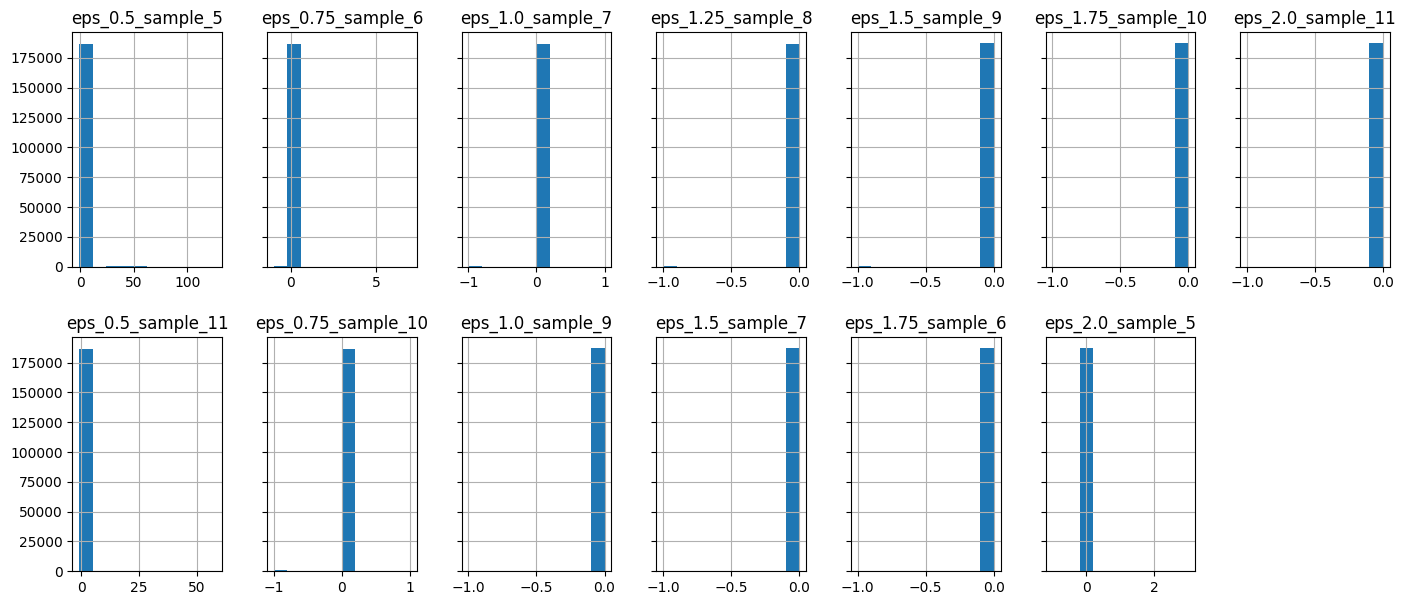

In [48]:
# review cluster distribution with different hyper-parameter combinations
Xs1.iloc[:,9:].hist(figsize=(17,7), layout=(2,7), sharey=True);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c582c783-261c-4fb2-b8e4-f04538c883e0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>